In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = "sans-serif"

# Customizing scatterplots

Text(0, 0.5, 'Enriched SARS-CoV-2 Peptides')

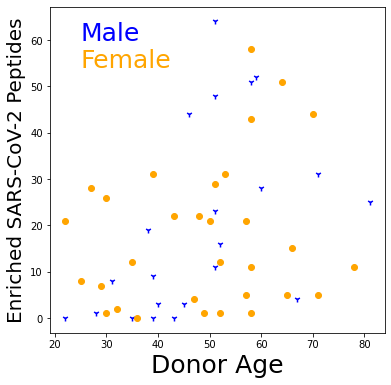

In [42]:
# Read in data
mDF = pd.read_csv("metadata.tsv", sep="\t", header=0)

# Initialize our figure
fig,ax = plt.subplots(1,1, figsize=(6,6))

mDF_male = mDF[mDF["Sex"]=="M"]
mDF_female = mDF[mDF["Sex"]=="F"]

ax.scatter(mDF_male["Age"], mDF_male["SARS2Peps"], marker="1", c="blue", alpha=1, label="Male")
ax.scatter(mDF_female["Age"], mDF_female["SARS2Peps"], marker="o", c="orange", alpha=1, label="Female")
#ax.legend(fontsize=10, loc="best")

ax.text(25, 60, "Male", fontsize=25, color="blue")
ax.text(25, 54, "Female", fontsize=25, color="orange")

ax.set_xlabel("Donor Age", fontsize=25)
ax.set_ylabel("Enriched SARS-CoV-2 Peptides", fontsize=20)

# Colormaps

Text(0, 0.5, 'Enriched Control Peptides')

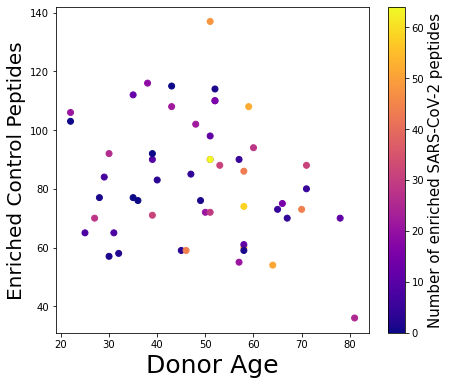

In [50]:
fig,ax = plt.subplots(1,1,figsize=(7,6))

sp = ax.scatter(mDF["Age"], mDF["ControlPeps"], c=mDF["SARS2Peps"], cmap="plasma")

cbar = fig.colorbar(sp)
cbar.set_label("Number of enriched SARS-CoV-2 peptides", fontsize=15)

ax.set_xlabel("Donor Age", fontsize=25)
ax.set_ylabel("Enriched Control Peptides", fontsize=20)

# Scatter plot vs. Heat Map

Text(2.2, 3.15, 'Enriched\nPeptides')

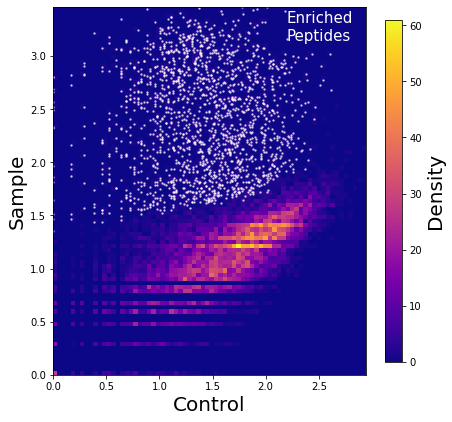

In [80]:
pD = pd.read_csv("pepCountData.tsv", sep="\t", header=0)

pD["logCC"] = np.log10(pD["ControlCount"]+1)
pD["logSC"] = np.log10(pD["SampleCount"]+1)

fig,ax = plt.subplots(1,1,figsize=(7,9))

heatmap, xedges, yedges = np.histogram2d(pD["logCC"], pD["logSC"], bins=(70,90))
hp = ax.imshow(heatmap.T, extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='plasma')

zThresh = 7
pD_sig = pD[pD["SampleZ"]>=zThresh]
ax.scatter(pD_sig["logCC"], pD_sig["logSC"], alpha=0.6, s=2, c="w")

cbar = fig.colorbar(hp, shrink=0.7)
cbar.set_label('Density', fontsize=20)

ax.set_xlabel("Control", fontsize=20)
ax.set_ylabel("Sample", fontsize=20)

#ax.set_xlim(1, 2)
#ax.set_ylim(1, 2)

ax.text(2.2, 3.15, "Enriched\nPeptides", color="w", fontsize=15)


# Maps

In [81]:
df = pd.read_csv("SLE_district_centroids.txt", sep="\t", index_col=0, header=None, names=["Longitude", "Latitude"])
df

,Longitude,Latitude
Kailahun,-10.645754,8.129091
Kenema,-11.165743,7.896995
Kono,-10.866380,8.683284
Bombali,-12.203870,9.293726
Koinadugu,-11.302096,9.329804
Tonkolili,-11.700000,8.750000
Bo,-11.737349,7.920407
WesternUrban,-13.266764,8.466012
Kambia,-13.080380,9.002102
Pujehun,-11.500000,7.300000


In [86]:
json = pd.read_json("SLE_v3.geojson")
json.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'id': 66, 'properties': {'..."
1,FeatureCollection,"{'type': 'Feature', 'id': 67, 'properties': {'..."
2,FeatureCollection,"{'type': 'Feature', 'id': 68, 'properties': {'..."
3,FeatureCollection,"{'type': 'Feature', 'id': 69, 'properties': {'..."
4,FeatureCollection,"{'type': 'Feature', 'id': 70, 'properties': {'..."


(-13.7, -10.0, 6.6, 10.2)

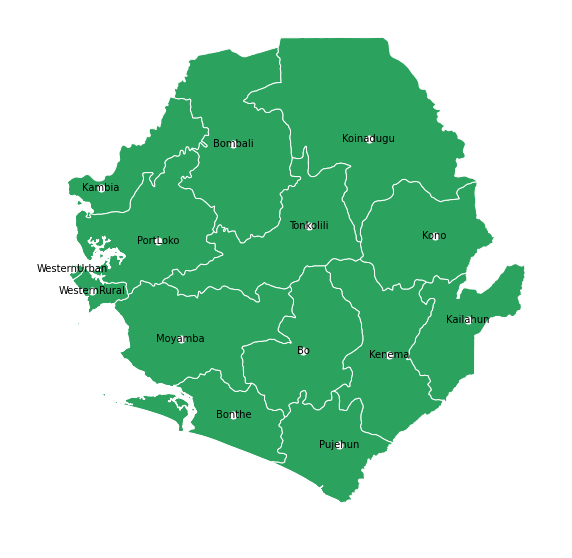

In [110]:
fig,ax = plt.subplots(1,1, figsize=(10,10), facecolor="w")

for loc in json['features']:
    pc = np.array(loc['geometry']['coordinates'], dtype=object)
    location = loc['properties']['location']
    
    if loc['geometry']['type'] == "Polygon":
        for coords in pc:
            poly=plt.Polygon(coords, facecolor="#2ca25f", edgecolor="w", closed=True, zorder=1)
            ax.add_patch(poly)

    elif loc['geometry']['type'] == "MultiPolygon":
        for part in pc:
            for coords in part:
                poly=plt.Polygon(coords, facecolor="#2ca25f", edgecolor="w", closed=True, zorder=1)
                ax.add_patch(poly)
    
    ax.scatter([df["Longitude"][location]], [df["Latitude"][location]], c="w", s=50, zorder=4)
    ax.text(df["Longitude"][location], df["Latitude"][location], location, zorder=5, ha="center", va="center")
            
# Need to change axes limits to see polygons
ax.set_ylim([6.6,10.2])
ax.set_xlim([-13.7,-10])

plt.axis('off')